### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking total rows and columns
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.duplicated().sum()

0

# Exploratory Data Analysis

### cleaning the dataset

In [8]:
#dropping lead number and prospect ID because they have unique values
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [9]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
#Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [11]:
df.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#dropping columns with more than 45% missing values
#drop 7 columns here
cols=df.columns
for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index)))>=45):
        df.drop(i,axis=1,inplace=True)

In [14]:
df.shape

(9240, 28)

In [15]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# univariate analysis

## Categorical Attributes Analysis

In [16]:
#1)Lead Source
df['Lead Source'].isnull().sum()

36

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


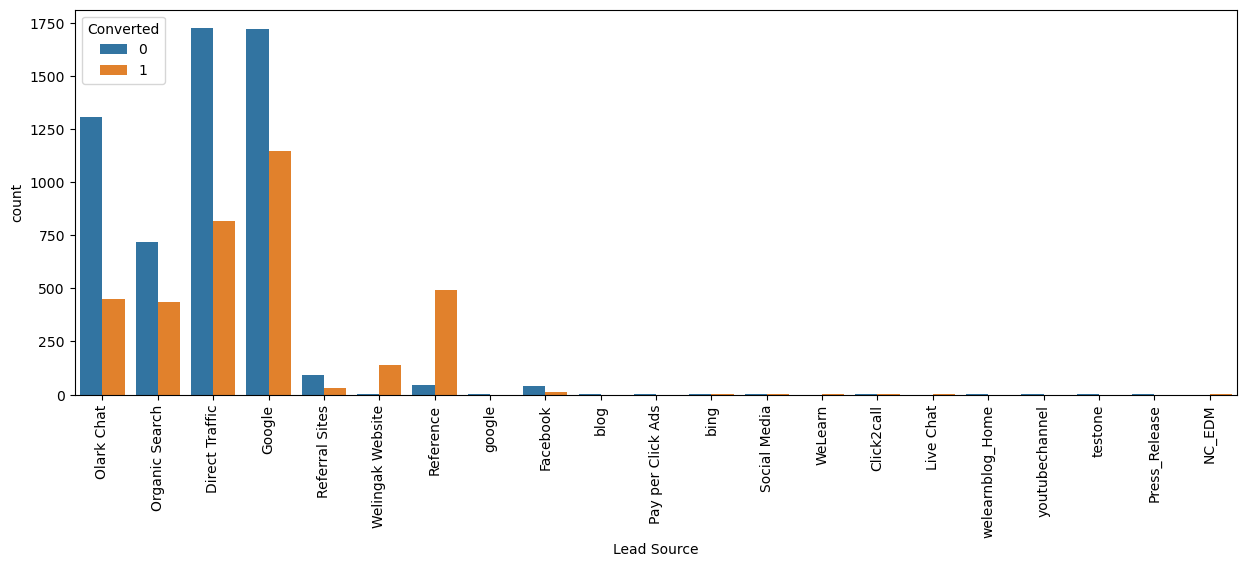

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['Lead Source'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [18]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Social Media')
df['Lead Source'] = df['Lead Source'].replace('google','Google')

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Social Media','Facebook'] ,'Social Media') 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


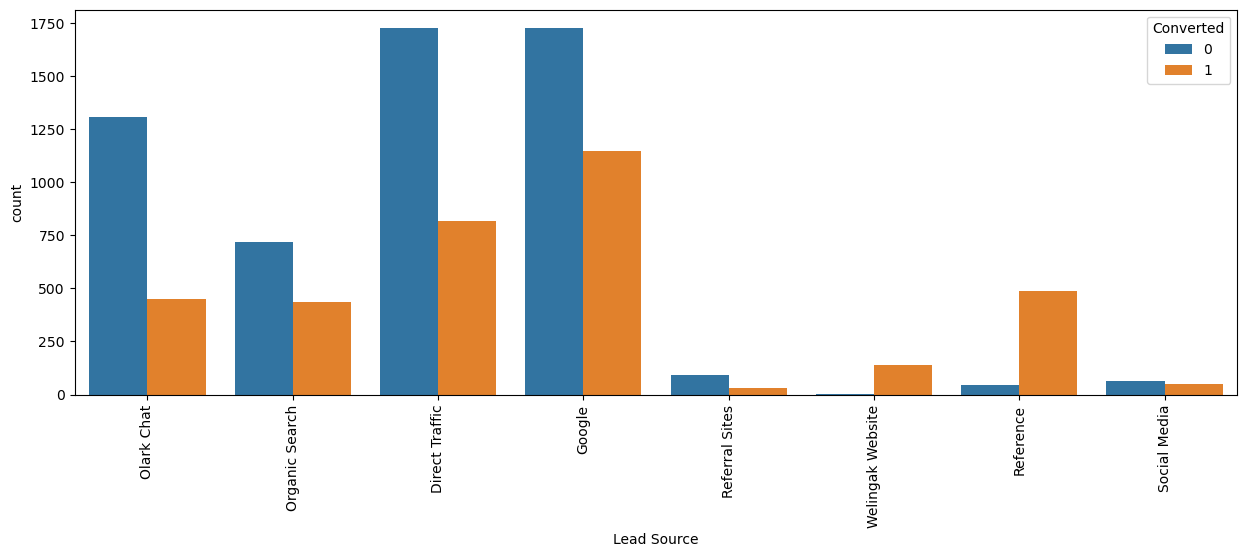

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df['Lead Source'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [20]:
#2)Country
df['Country'].isnull().sum()

2461

In [21]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [22]:
df['Country']=df['Country'].replace(np.nan,'India')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


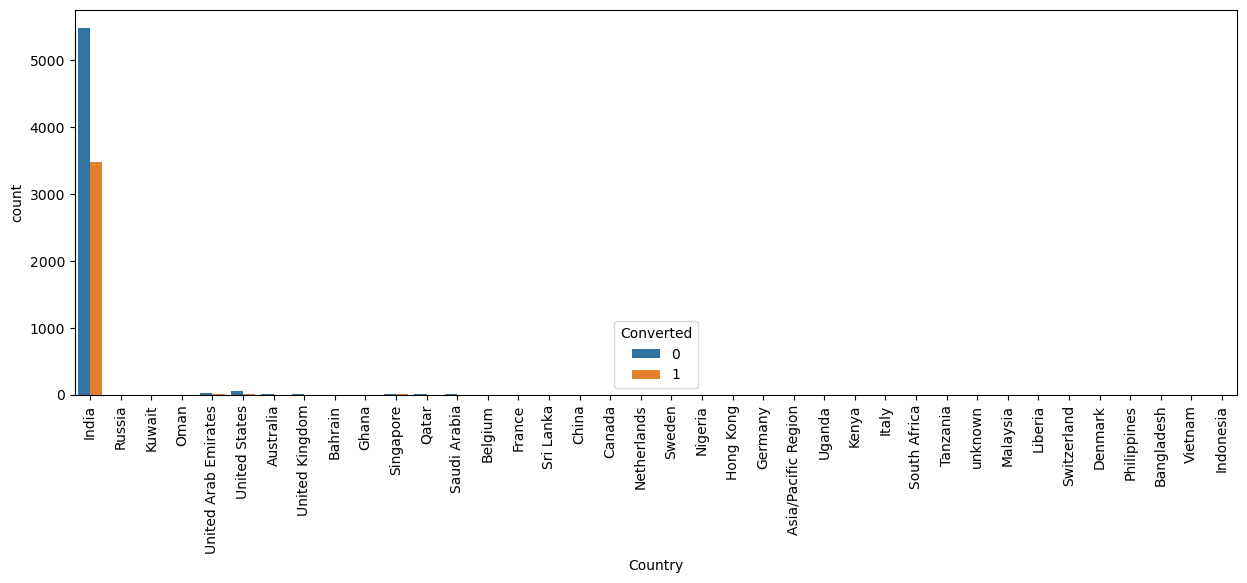

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df['Country'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [24]:
df['Country'].isnull().sum()

0

In [25]:
#3)Specialization
df['Specialization'].isnull().sum()

3380

In [26]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [27]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


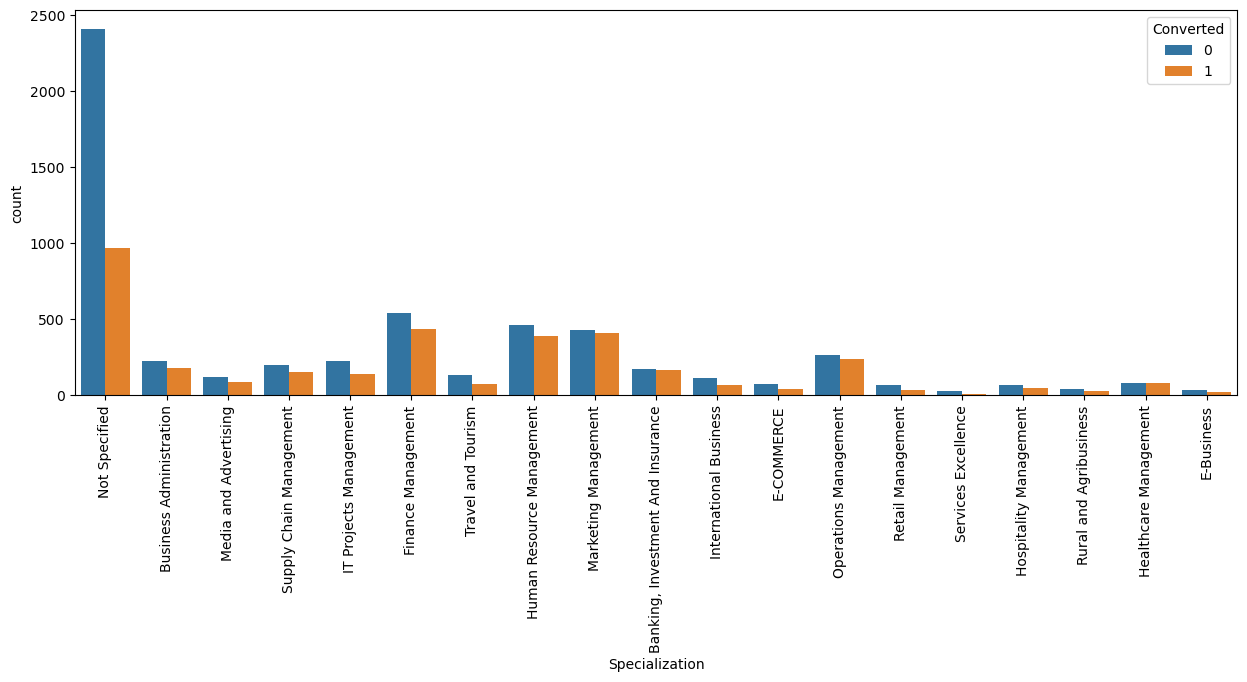

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(df['Specialization'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [29]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [30]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
#4)What is your current occupation
df['What is your current occupation'].isnull().sum()

2690

In [32]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


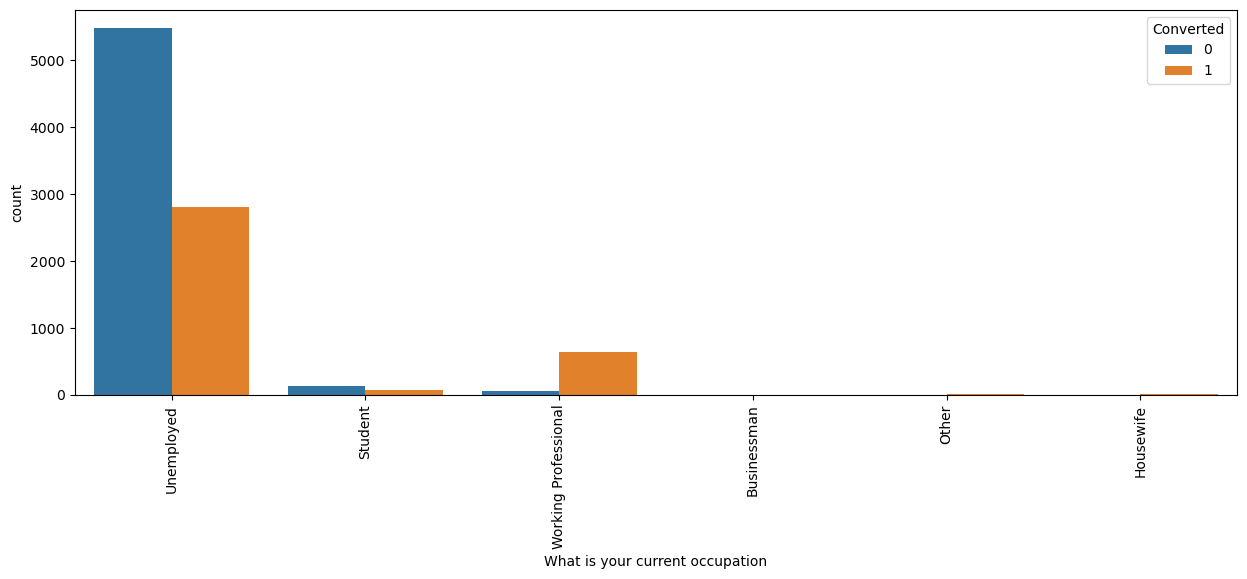

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(df['What is your current occupation'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [35]:
#5)What matters most to you in choosing a course
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [36]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


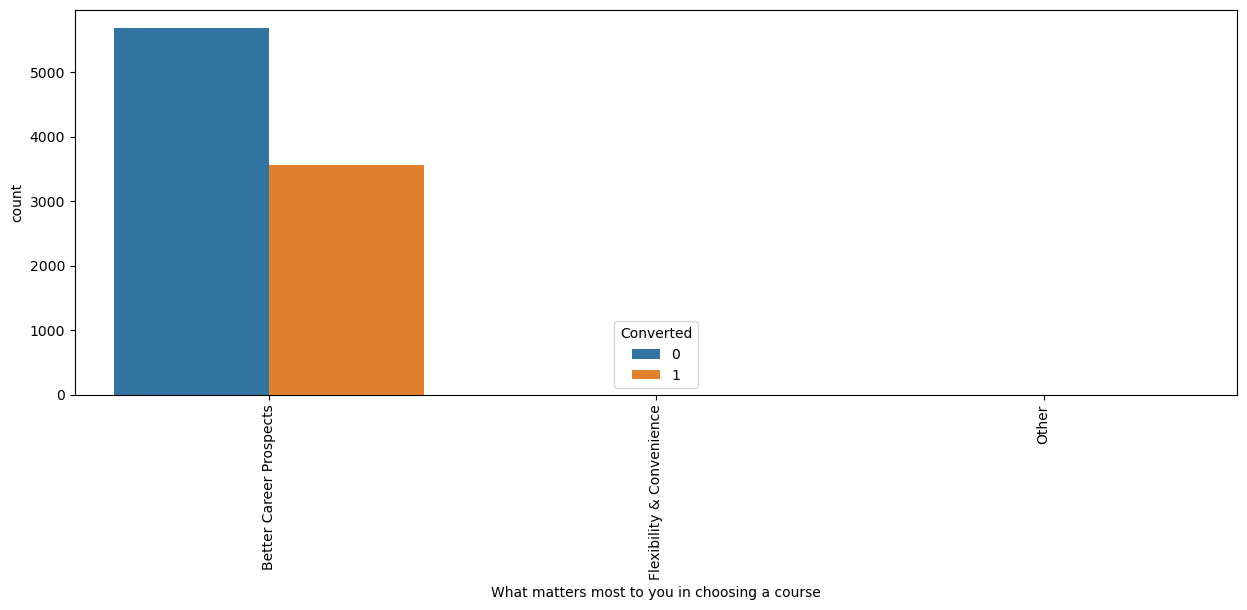

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df['What matters most to you in choosing a course'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [39]:
#6)Tags
df['Tags'].isnull().sum()

3353

In [40]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [41]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


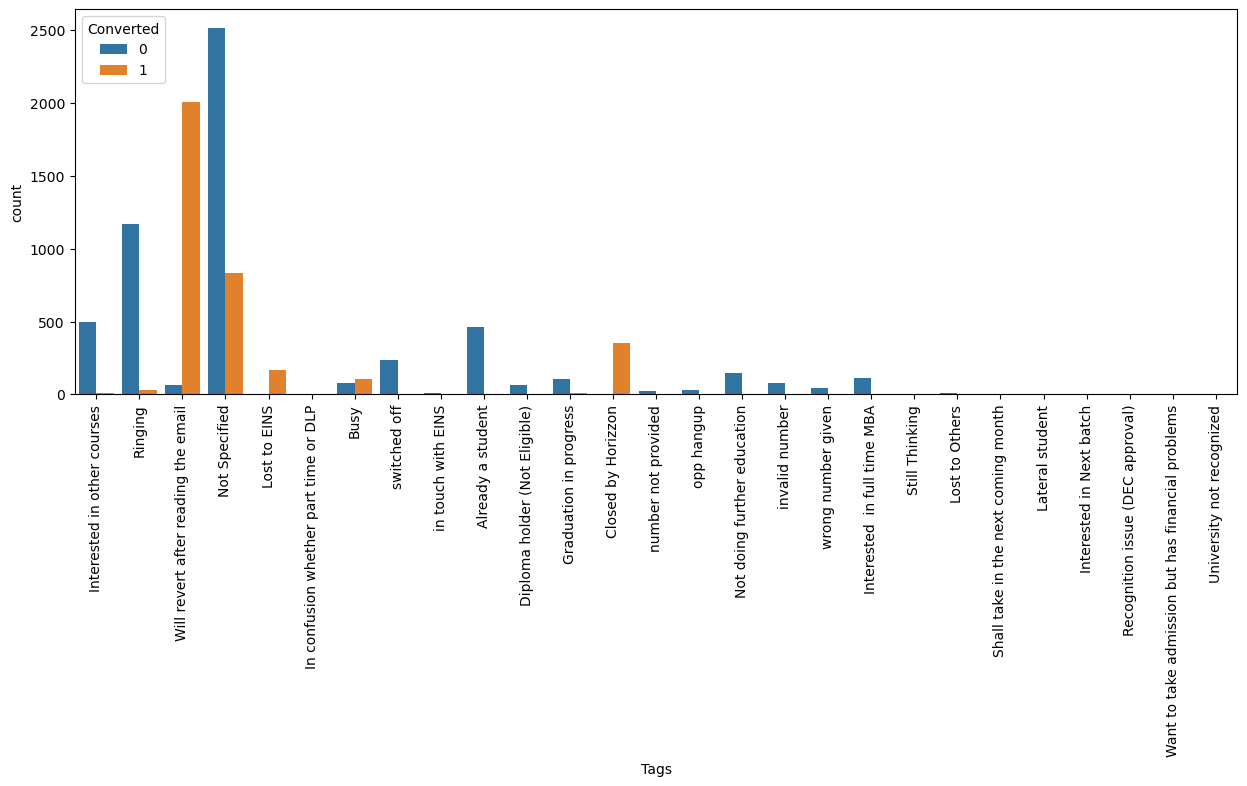

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [43]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


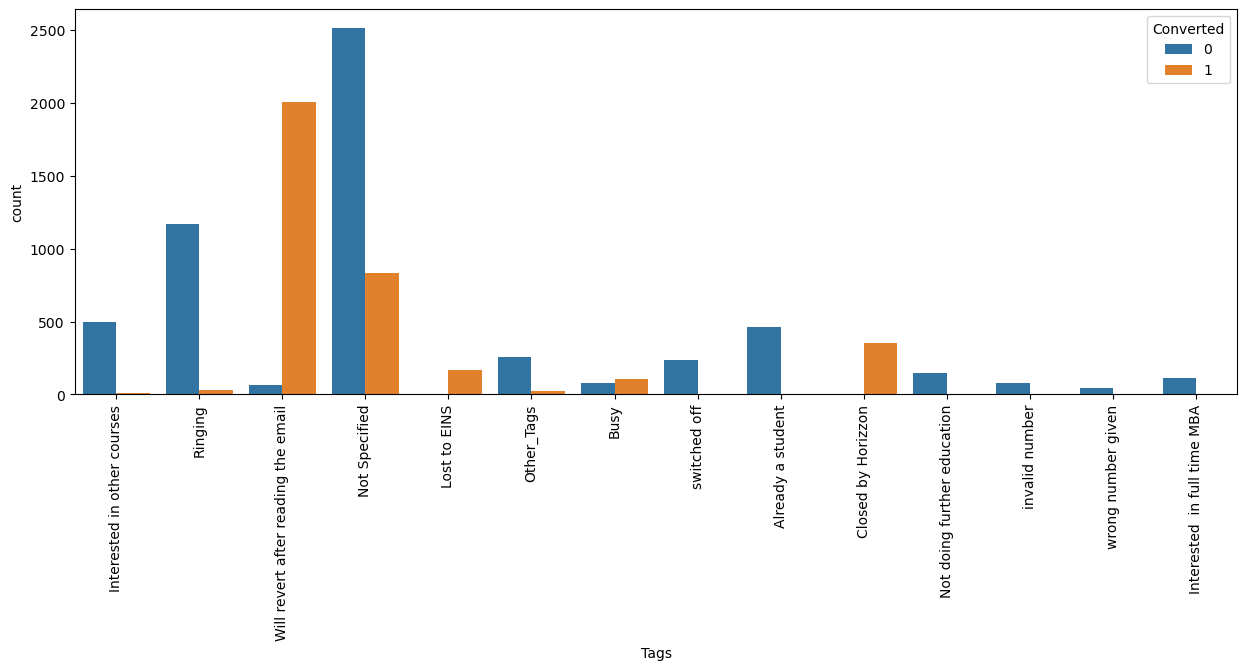

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [45]:
df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


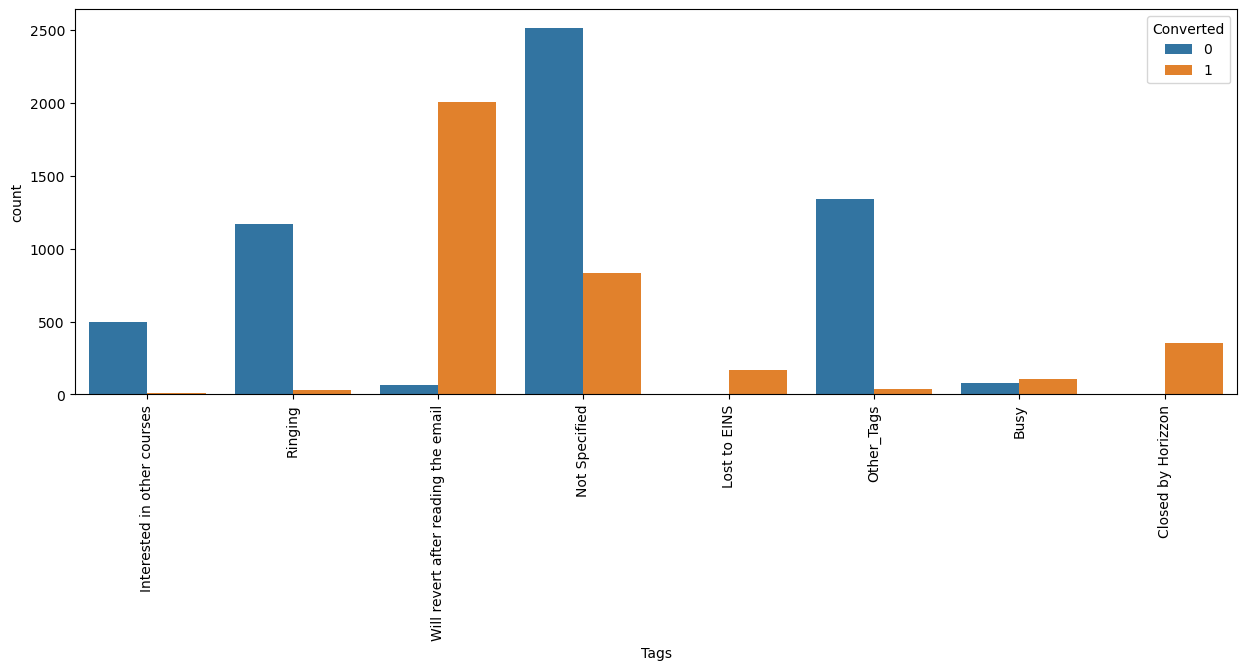

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [47]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [48]:
#7)city
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [49]:
df['City'].isnull().sum()

3669

In [50]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


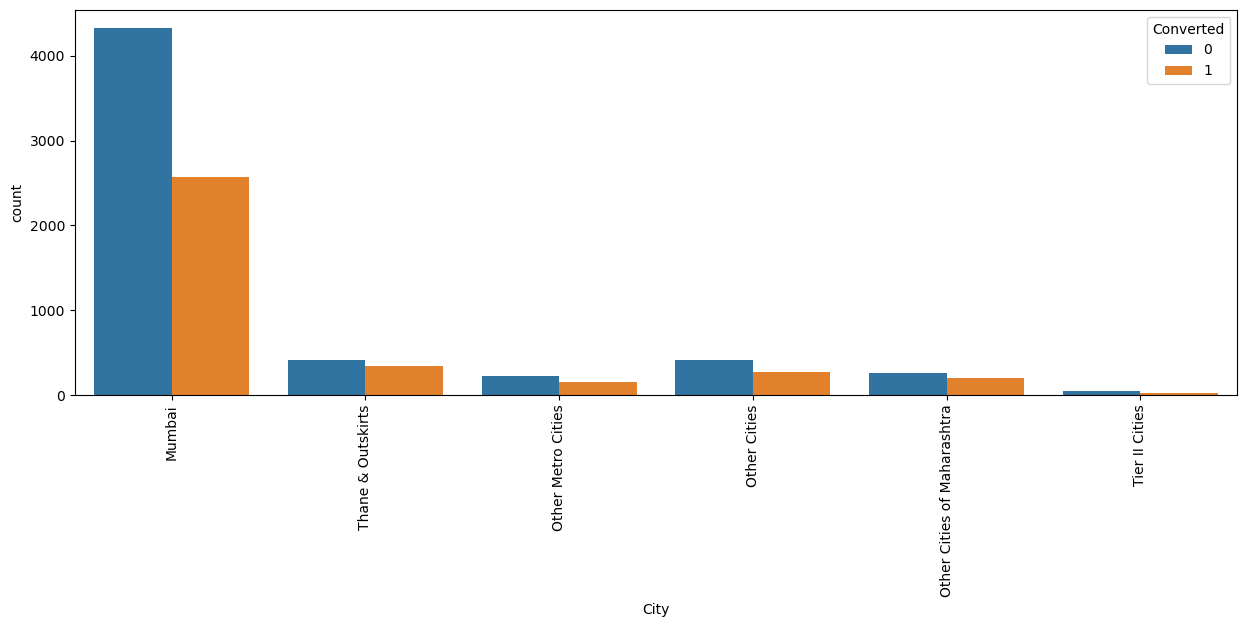

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(df['City'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [52]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [53]:
#8)Lead Origin
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


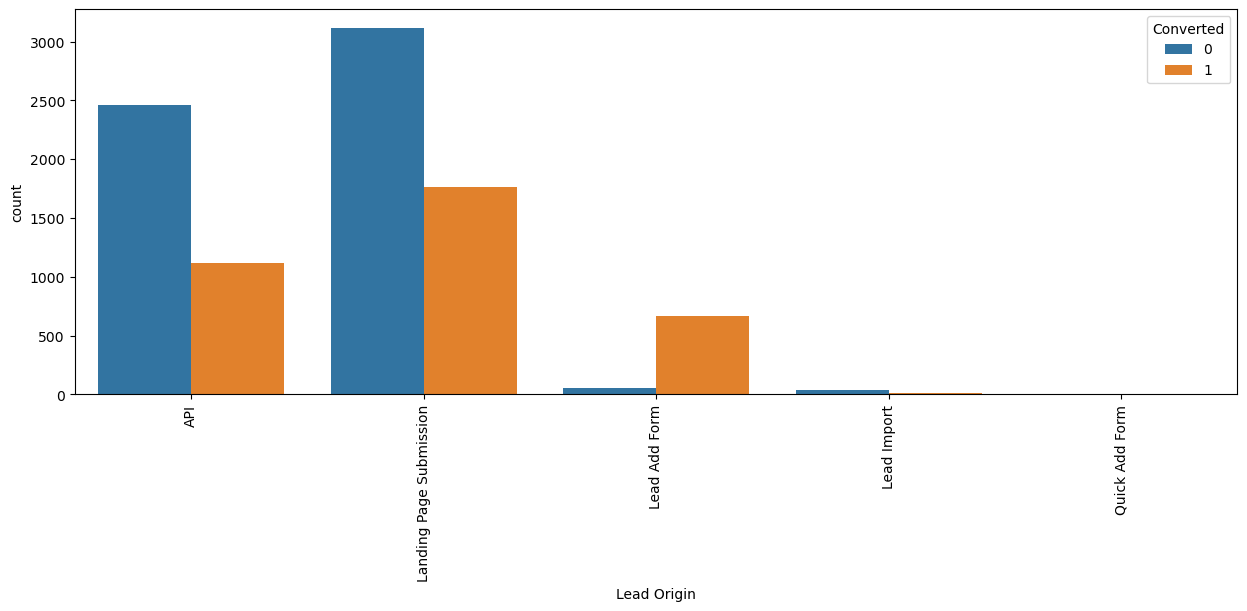

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(df['Lead Origin'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [55]:
#8)Last Activity
df['Last Activity'].value_counts() 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


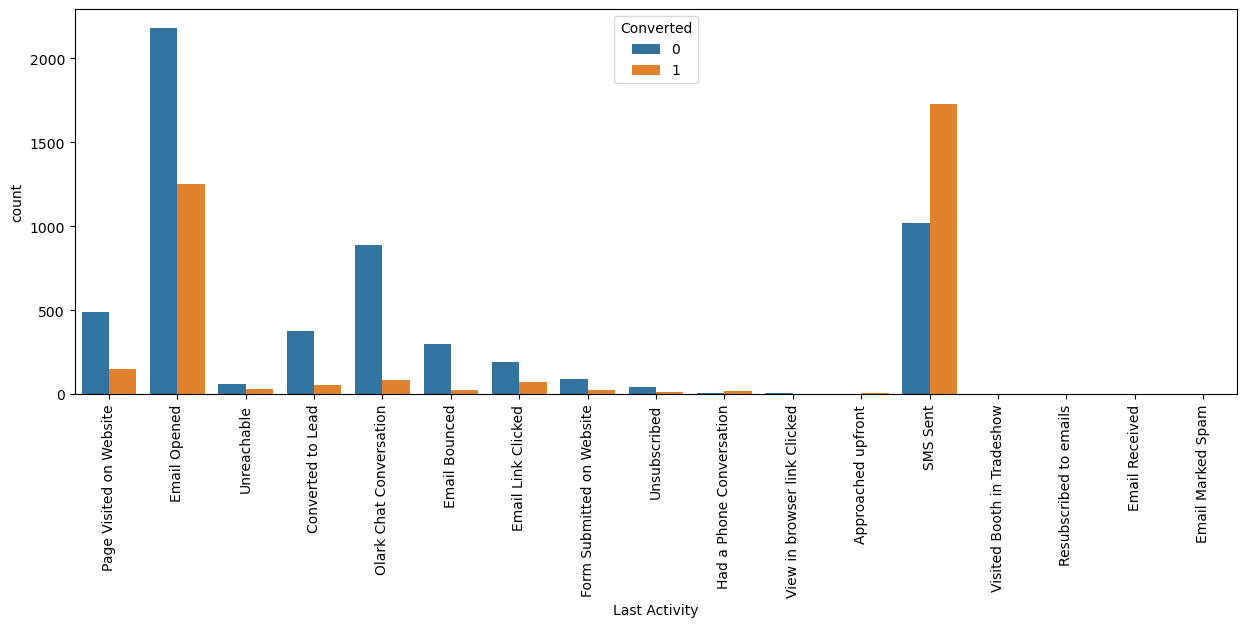

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(df['Last Activity'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [57]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [58]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df=df.dropna()
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


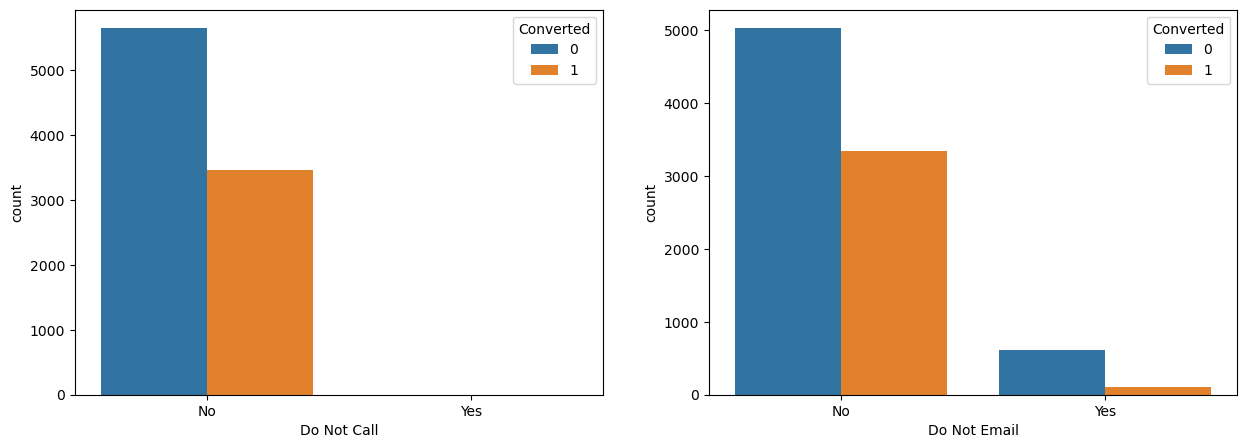

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Do Not Call'],hue=df.Converted)
plt.subplot(1,2,2)
sns.countplot(df['Do Not Email'],hue=df.Converted)
plt.show()

In [60]:
df['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [61]:
df['Search'].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [62]:
df['Magazine'].value_counts()

No    9103
Name: Magazine, dtype: int64

In [63]:
df['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [64]:
df['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [65]:
df['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [66]:
df['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [67]:
df['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [68]:
df['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [69]:
df['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [70]:
df['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [71]:
df['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [72]:
df['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


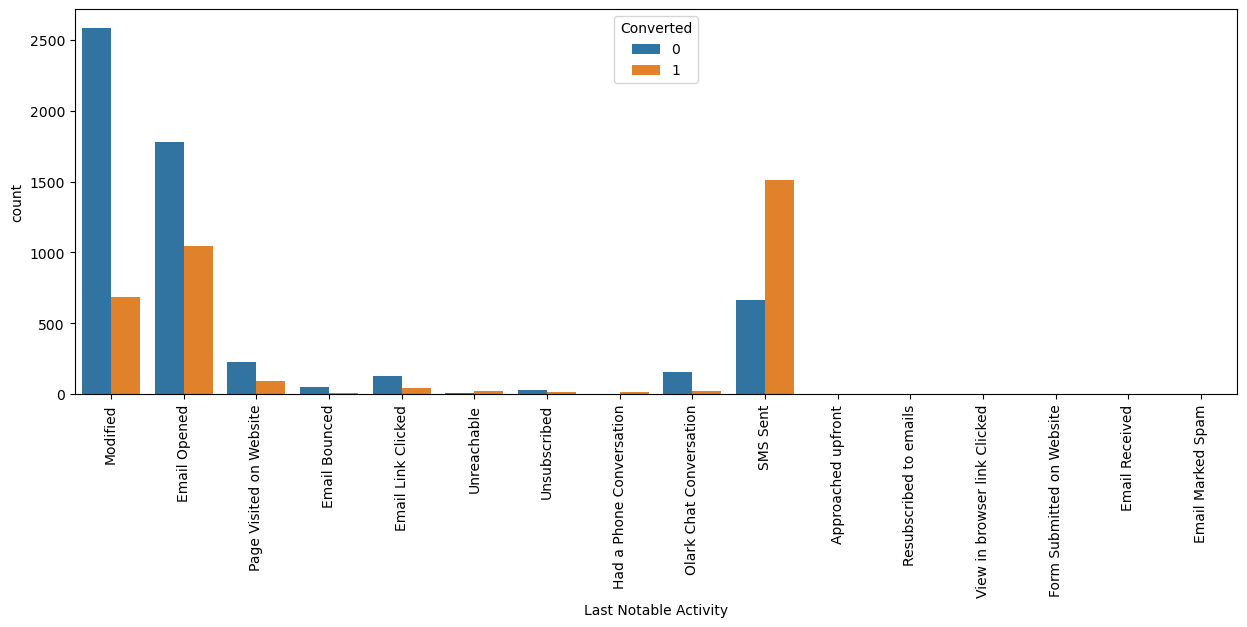

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(df['Last Notable Activity'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [75]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


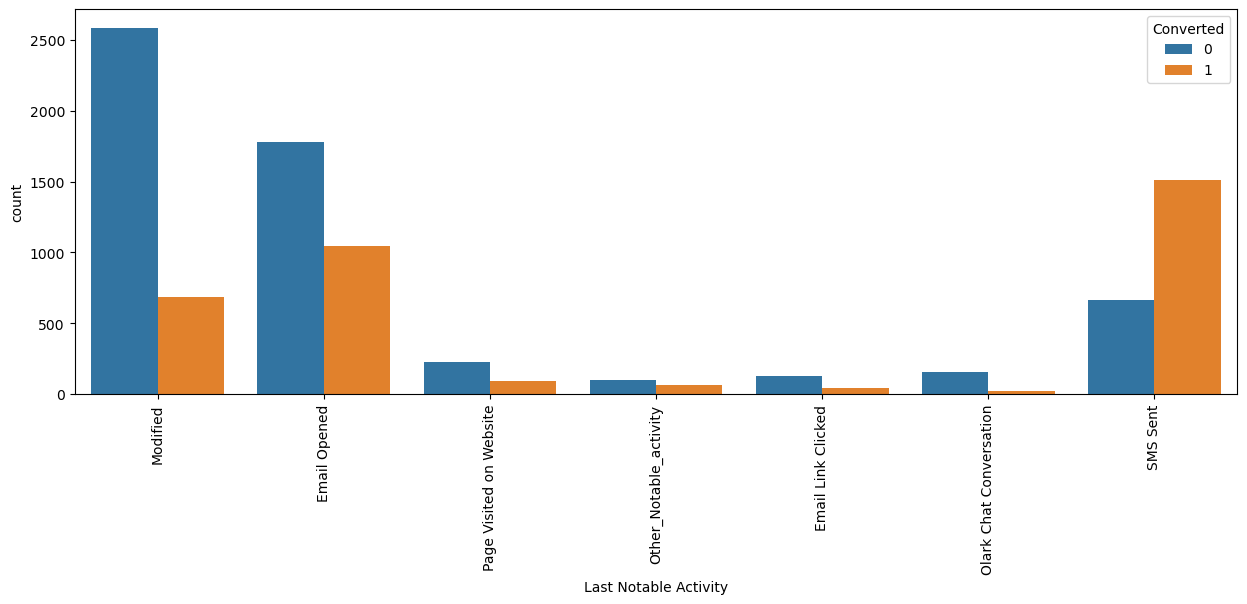

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(df['Last Notable Activity'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [77]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
drop_columns=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper' ,'Digital Advertisement'  ,'Through Recommendations','Receive More Updates About Our Courses' ,'Update me on Supply Chain Content' 
,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Country',
 'What matters most to you in choosing a course']

In [79]:
df1=df.drop(drop_columns,axis=1)

In [80]:
df1.shape

(9103, 14)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Attributes Analysis

In [82]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df1['Converted'])/len(df1['Converted'].index))*100
Converted

38.02043282434362

In [83]:
df1['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

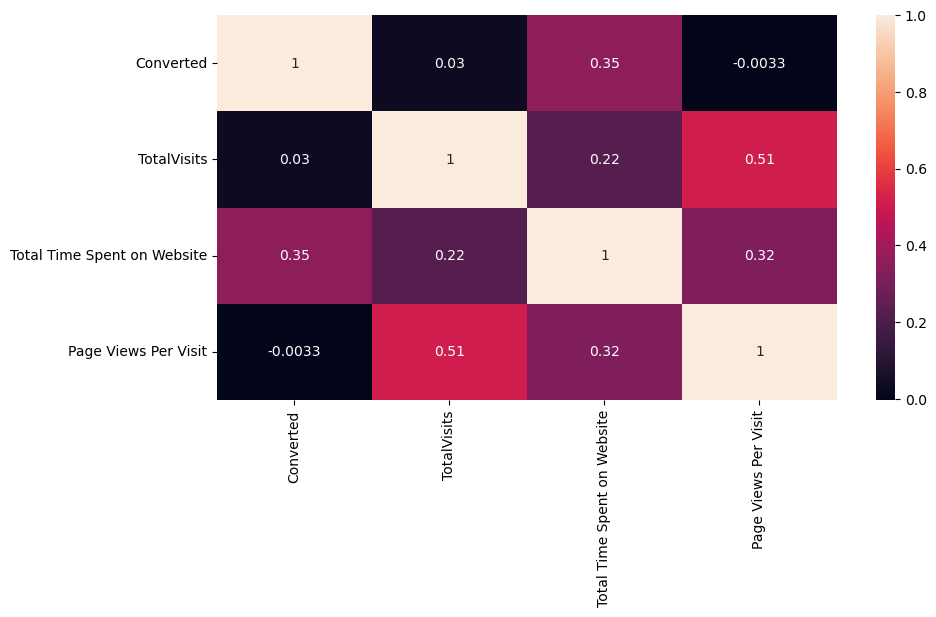

In [84]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,5))

# heatmap
sns.heatmap(df1.corr(), annot=True)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

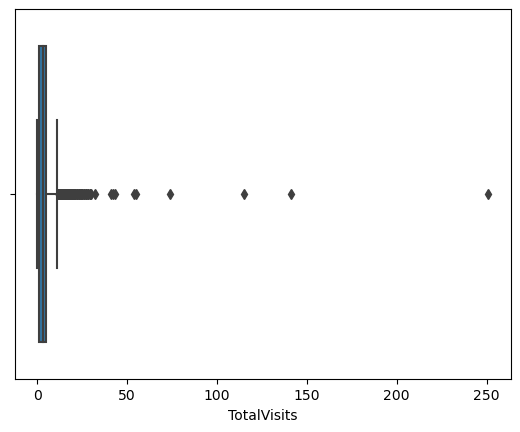

In [85]:
#boxplot
sns.boxplot(df1['TotalVisits'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


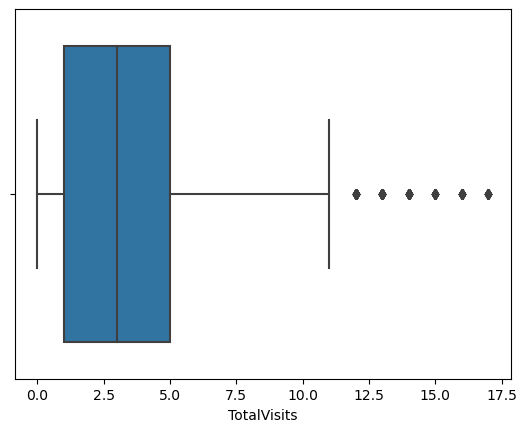

In [86]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df1.TotalVisits.quantile(0.99)
df1 = df1[(df1.TotalVisits <= Q3)]
Q1 = df1.TotalVisits.quantile(0.01)
df1 = df1[(df1.TotalVisits >= Q1)]
sns.boxplot(df1['TotalVisits'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Time Spent on Website'>

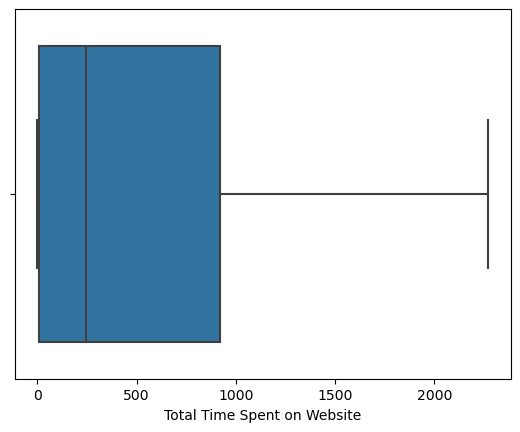

In [87]:
sns.boxplot(df['Total Time Spent on Website'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

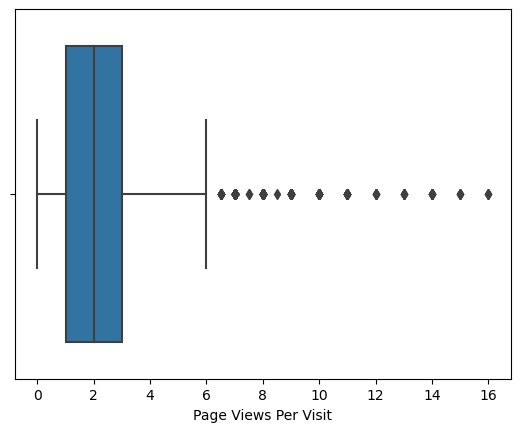

In [88]:
sns.boxplot(df1['Page Views Per Visit'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


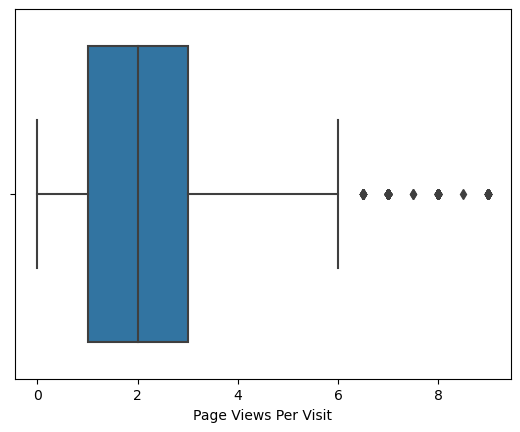

In [89]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df1['Page Views Per Visit'].quantile(0.99)
df1 = df1[df1['Page Views Per Visit'] <= Q3]
Q1 = df1['Page Views Per Visit'].quantile(0.01)
df1 = df1[df1['Page Views Per Visit'] >= Q1]
sns.boxplot(df1['Page Views Per Visit'])
plt.show()

In [90]:
df1.shape

(8953, 14)

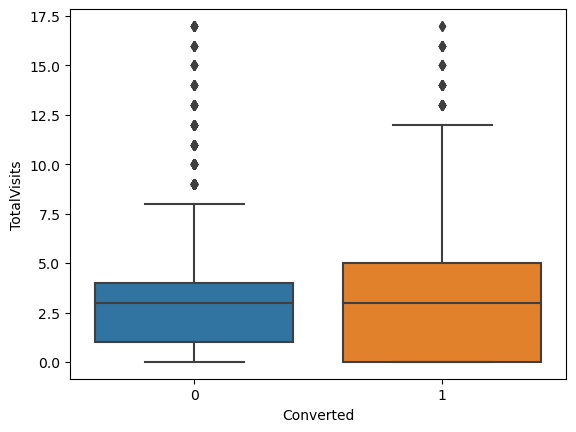

In [91]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df1)
plt.show()

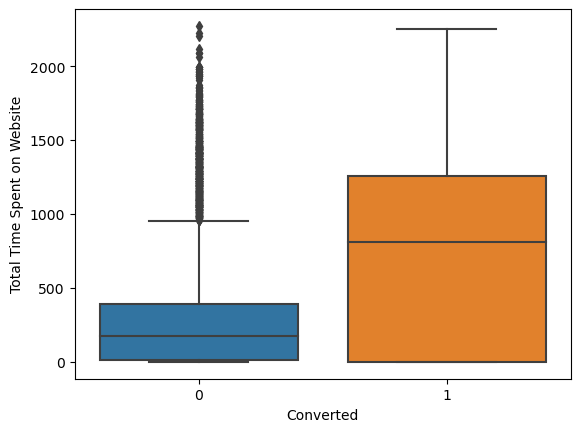

In [92]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df1.Converted, y=df1['Total Time Spent on Website'])
plt.show()

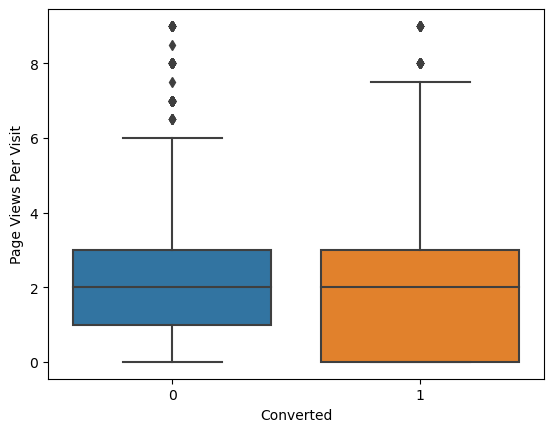

In [93]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df1.Converted,y=df1['Page Views Per Visit'])
plt.show()

In [94]:
#checking missing values
round(100*(df1.isnull().sum()/len(df1.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## creating dummy variables

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [96]:
df1.loc[:,df1.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [97]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df1[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview','Tags','City', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df1_dum = pd.concat([df1, dummy], axis=1)
df1_dum

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,1,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,1
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,0,0,0,1
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,1,0,0,0,0,0,0,0,1


In [98]:
df1_dum = df1_dum.drop(['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview','Tags','City', 'Last Notable Activity'], axis=1)
df1_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## split the data

In [99]:
x=df1_dum.drop('Converted',axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
# Putting the target variable in y
y=df1_dum['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 8953, dtype: int64

In [101]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [102]:
x_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2034,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8902,1.0,78,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3691,2.0,284,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5034,4.0,1589,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2464,2.0,1080,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,4.0,488,4.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8076,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
963,11.0,1166,2.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5358,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [104]:
x_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2034,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8902,0.058824,0.034331,0.111111,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3691,0.117647,0.125000,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5034,0.235294,0.699384,0.444444,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2464,0.117647,0.475352,0.222222,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,0.235294,0.214789,0.444444,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8076,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
963,0.647059,0.513204,0.244444,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5358,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
y_train

2034    0
8902    1
3691    1
5034    0
2464    1
       ..
3016    0
8076    0
963     0
5358    0
252     0
Name: Converted, Length: 7162, dtype: int64

## Model building

In [106]:
#model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

### feature selection using RFE

In [107]:
# Import RFE
from sklearn.feature_selection import RFE

In [108]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=model, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# Features that have been selected by RFE
list(zip(x_train, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_International Business', False, 13),
 ('Specialization_Management_Specializations', False, 17),
 ('Specialization_Media and Advertising', False, 29),
 ('Specialization_Not Specified', False, 15),
 ('Specialization_Rural and Agribusiness', False, 16),
 ('Specialization_Services Excellence', False, 37),
 ('Specialization_Travel and Tourism', False, 14),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 39),
 ('L

In [110]:
# Put all the columns selected by RFE in the variable 'col'
col = x_train.columns[rfe.support_]

In [111]:
# Selecting columns selected by RFE
x_train = x_train[col]
x_test  = x_test[col]

In [112]:
model1 = model.fit(x_train,y_train)
model1

LogisticRegression()

In [113]:
y_pred=model1.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [114]:
y_test

9190    0
5625    0
6082    0
6847    0
7470    1
       ..
3144    0
7513    0
4913    1
2333    1
7430    0
Name: Converted, Length: 1791, dtype: int64

In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[1060,   61],
       [  88,  582]], dtype=int64)

In [116]:
total=sum(sum(cm))
total

1791

In [117]:
print(accuracy_score(y_test,y_pred))

0.9168062534896706


In [118]:
#from confusion matrix calculate accuracy
#Sensitivity = (True Positive)/(True Positive + False Negative)
#Specificity = (True Negative)/(True Negative + False Positive)

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9168062534896706
Sensitivity :  0.9455842997323818
Specificity :  0.8686567164179104


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1121
           1       0.91      0.87      0.89       670

    accuracy                           0.92      1791
   macro avg       0.91      0.91      0.91      1791
weighted avg       0.92      0.92      0.92      1791



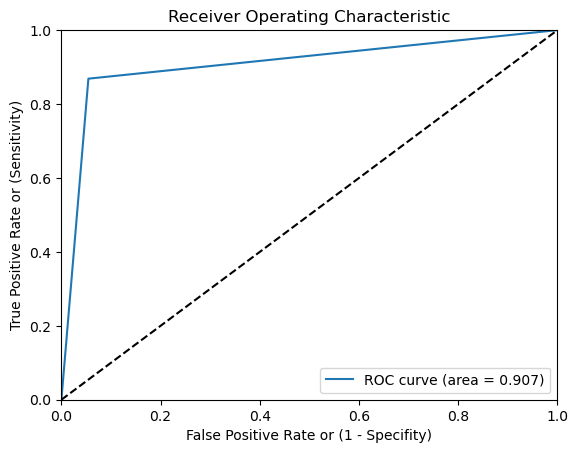

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")